Lost Revenue: £16729287.46
Average ADR: £99.99
Average ADR For Canceled Bookings: £104.96
Average Lead Time: 80.0 days
Average Lead Time For Canceled Bookings: 144.8 days
Average Booking Changes: 0.3
Average Booking Changes For Canceled Bookings: 0.1


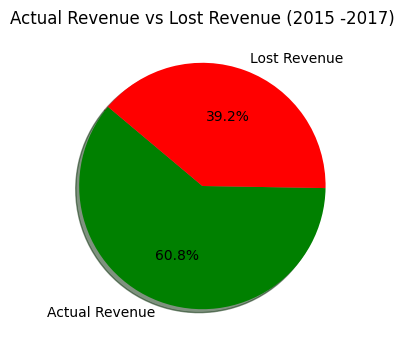

<Figure size 1000x300 with 0 Axes>

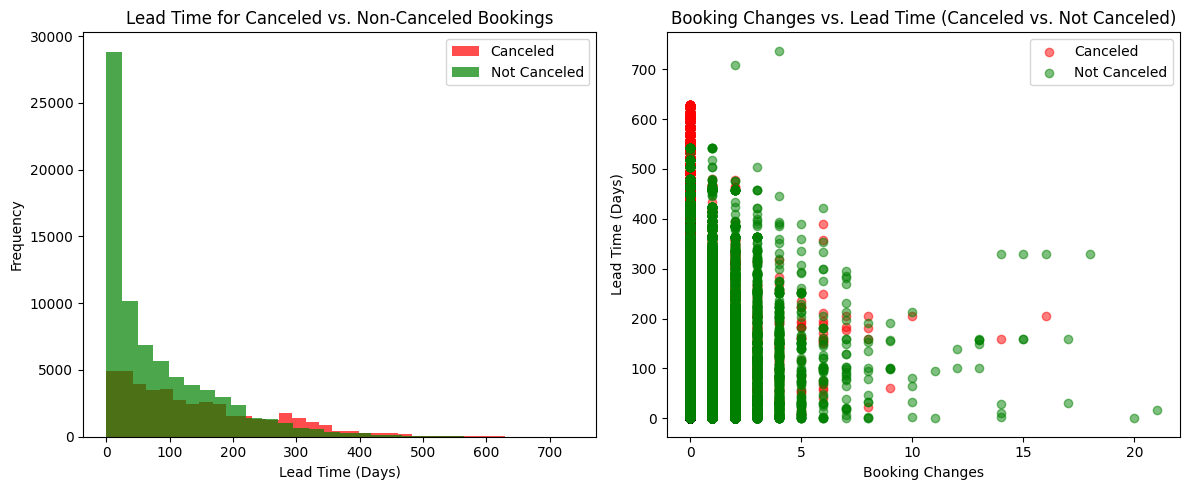

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('hotel_bookings.csv')#('hotel_bookings(1).csv') <-- original

selected_columns = ['is_canceled', 'lead_time', 'booking_changes']
data = df[selected_columns]

canceled = data[data['is_canceled'] == 1]
notCanceled = data[data['is_canceled'] == 0]

# determining the total nights booked per customer and the projected revenue from their stay
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['potential_revenue'] = df['adr'] * df['total_nights']

# potential, actual and lost revenue from 2015 - 2017
potentialRevenue = df['potential_revenue'].sum()
actualRevenue = df[df['is_canceled'] == 0]['potential_revenue'].sum()
lostRevenue = potentialRevenue - actualRevenue

print(f"Lost Revenue: £{lostRevenue:.2f}")

# Determine the average adr, lead time and booking changes for non-cancelled and cancelled bookings
averageAdr = df[df['is_canceled'] == 0]['adr'].mean()
averageCanceledAdr = df[df['is_canceled'] == 1]['adr'].mean()
averageLeadTime =df[df['is_canceled'] == 0]['lead_time'].mean()
averageCanceledLeadTime = df[df['is_canceled'] == 1]['lead_time'].mean()
averageBookingChanges = df[df['is_canceled'] == 0]['booking_changes'].mean()
averageCanceledBookingChanges = df[df['is_canceled'] == 1]['booking_changes'].mean()# Average booking changes

# Print the average adr, lead time and booking changes for non-cancelled and cancelled bookings
print(f"Average ADR: £{averageAdr:.2f}")
print(f"Average ADR For Canceled Bookings: £{averageCanceledAdr:.2f}")
print(f"Average Lead Time: {averageLeadTime:.1f} days")
print(f"Average Lead Time For Canceled Bookings: {averageCanceledLeadTime:.1f} days")
print(f"Average Booking Changes: {averageBookingChanges:.1f}")
print(f"Average Booking Changes For Canceled Bookings: {averageCanceledBookingChanges:.1f}")

# Create Pie Chart Actual Revenue vs Lost Revenue 
labels = ['Actual Revenue' , 'Lost Revenue']
sizes = [actualRevenue, lostRevenue]
colors = ['green', 'red']
plt.figure(figsize=(4, 4))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Actual Revenue vs Lost Revenue (2015 -2017)')
plt.show()

plt.figure(figsize=(10, 3))


plt.figure(figsize=(12, 5))
#Lead Time for Canceled vs. Non-Canceled Bookings
plt.subplot(1, 2, 1)
plt.hist(canceled['lead_time'], bins=30, alpha=0.7, label='Canceled', color='red')
plt.hist(notCanceled['lead_time'], bins=30, alpha=0.7, label='Not Canceled', color='green')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.title('Lead Time for Canceled vs. Non-Canceled Bookings')
plt.legend()

# Booking Changes vs. Lead Time
plt.subplot(1, 2, 2)
plt.scatter(canceled['booking_changes'], canceled['lead_time'], alpha=0.5, color='red', label='Canceled')
plt.scatter(notCanceled['booking_changes'], notCanceled['lead_time'], alpha=0.5, color='green', label='Not Canceled')
plt.xlabel('Booking Changes')
plt.ylabel('Lead Time (Days)')
plt.title('Booking Changes vs. Lead Time (Canceled vs. Not Canceled)')
plt.legend()

plt.tight_layout()
plt.show()

Business Question:
How do booking lead time and booking changes impact hotel booking cancellations, and what is the financial impact of these cancellations on total revenue?  

Relevance:
Understanding booking cancellation patterns is very important for hotel management. A high rate of cancellations would lead to a loss in revenue and hinder the projected profits for a fiscal year leading to a misallocation of resources leading to further revenue loss. By analyzing factors such as lead time and bookings changes, hotels can develop strategies to reduce cancellations by making changes to the given factors

Data Justifications:
For the data analysis I used 5 specific attributes from the dataset to address my business question. These specific attributes are suitable to answer the question for the following reasons:
1)is_canceled: Identifies all of the canceled bookings and the bookings that weren’t cancelled
2) lead_time: Identifies the number of days between booking and arrival for each customer  
3) booking_changes: Determines the number of changes made to reservations by customers  
4) adr (Average Daily Rate) and 5)total_nights: Used together to calculate potential revenue, actual revenue and revenue lost.

Findings and Insights: 
It can be seen that there is a substantial loss in revenue due to cancelled booking and when analyzing the lead time and booking  changes we see:

1)Lead Time: A histogram comparing lead times shows that canceled bookings often have longer lead times. This suggests that customers booking far in advance are more likely to cancel their bookings. The average lead time for non-cancelled bookings is 80.0 days and the lead time for cancelled booking is 144.8 days, indicating the massive difference between the two and that a higher lead time will likely influence the chance of cancellation leading to a loss in revenue.

2)Booking Changes and Cancellations: A scatter plot reveals a trend between the booking changes and lead time indicating that higher booking changes do not lead to higher cancellation rates. This suggests that the more booking changes made by customers does not mean they are more likely to cancel their bookings. The average booking changes made by non-cancelled booking is 0.3 and the average booking changes made by cancelled booking is 0.1, there is a small difference between the two and thus booking changes do not affect booking cancellations and the potential revenue of hotels 

With an average adr of  £99.99 for non-cancelled bookings and and average adr of £104.96 for can cancelled bookings it is evident that booking cancellations lead to a serious loss in revenue for the hotel (between 2015 - 2017 lost revenue of £16729287.46) and that longer lead times are a serious contributor to the cancellations and thus a loss in revenue






- A) Very good for the business question and the answer. 68
- B) Very good for the use of data. 70
- C) Good for the visualization. 60
- D) Good for the code structure. 60

The business question is stated very clearly with solid and logical analysis.

A wide range of features are used to address the question, and why they are appropriate for the task is explained.

The visualization is good overall, but the last subplot 'Booking changes vs. Lead Time' needs more clarification.

The code is clear overall, except that the data seems not imported correctly (a file name issue).

In [4]:
import numpy as np

A, B, C, D = 68, 70, 60, 60

print('overall mark: ' + str(np.mean([A, B, C, D])))

overall mark: 64.5
